# MAE<=0.3 , MSE<=0.2  et RMSE<=0.4 

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
# Load combined results
df = pd.read_csv("gnn_results/gcn/gcn_results_combined.csv")

In [45]:
# Find the best result by test_f1
best_result = df.loc[df["test_mae"].idxmin()]
print("Best Result:")
print(best_result)

Best Result:
timestamp       2025-12-23T13:22:22.370973
model                                  GCN
config_id                              128
fold                                     2
hidden_dim                             256
num_layers                               3
heads                                    1
dropout                                0.0
lr                                   0.001
weight_decay                           0.0
train_acc                         0.616987
train_f1                           0.27943
train_mae                         0.529649
train_mse                         0.822922
train_rmse                         0.90715
val_acc                           0.616361
val_f1                             0.27887
val_mae                           0.530267
val_mse                           0.823522
val_rmse                          0.907481
test_acc                           0.61672
test_f1                           0.279075
test_mae                          0.52947

In [46]:
# Group by config_id and get average test_f1 for each configuration
avg_results = df.groupby("config_id").agg({
    "test_mae": "mean",
    "test_mse": "mean",
    "test_rmse": "mean"
}).reset_index()

In [47]:
# Display top 5 configurations by average test_f1
top_configs = avg_results.sort_values(by="test_mse", ascending=True).head(5)
print("\nTop 5 Configurations:")
print(top_configs)


Top 5 Configurations:
     config_id  test_mae  test_mse  test_rmse
79          79  0.739891  0.875589   0.935650
112        112  0.811742  0.932219   0.964917
36          36  0.808099  0.951733   0.972017
50          50  0.682062  0.978752   0.989078
129        129  0.827723  0.985439   0.991136


In [53]:
# 1) Global minima values
min_mae  = avg_results["test_mae"].min()
min_mse  = avg_results["test_mse"].min()
min_rmse = avg_results["test_rmse"].min()

print("Global minima:")
print(f"min MAE  = {min_mae:.4f}")
print(f"min MSE  = {min_mse:.4f}")
print(f"min RMSE = {min_rmse:.4f}")

# 2) Rows (configs) that achieve each minimum
best_mae_rows  = avg_results[avg_results["test_mae"]  == min_mae]
best_mse_rows  = avg_results[avg_results["test_mse"]  == min_mse]
best_rmse_rows = avg_results[avg_results["test_rmse"] == min_rmse]

print("\nBest config(s) by MAE:")
print(best_mae_rows[["config_id","hidden_dim","num_layers","heads",
                     "dropout","lr","weight_decay",
                     "test_mae","test_mse","test_rmse"]])

print("\nBest config(s) by MSE:")
print(best_mse_rows[["config_id","hidden_dim","num_layers","heads",
                     "dropout","lr","weight_decay",
                     "test_mae","test_mse","test_rmse"]])

print("\nBest config(s) by RMSE:")
print(best_rmse_rows[["config_id","hidden_dim","num_layers","heads",
                      "dropout","lr","weight_decay",
                      "test_mae","test_mse","test_rmse"]])

Global minima:
min MAE  = 0.6821
min MSE  = 0.8756
min RMSE = 0.9357

Best config(s) by MAE:
    config_id  hidden_dim  num_layers  heads  dropout      lr  weight_decay  \
50         50         128           2      1      0.0  0.0003           0.0   

    test_mae  test_mse  test_rmse  
50  0.682062  0.978752   0.989078  

Best config(s) by MSE:
    config_id  hidden_dim  num_layers  heads  dropout      lr  weight_decay  \
79         79         128           3      1      0.3  0.0003        0.0005   

    test_mae  test_mse  test_rmse  
79  0.739891  0.875589    0.93565  

Best config(s) by RMSE:
    config_id  hidden_dim  num_layers  heads  dropout      lr  weight_decay  \
79         79         128           3      1      0.3  0.0003        0.0005   

    test_mae  test_mse  test_rmse  
79  0.739891  0.875589    0.93565  


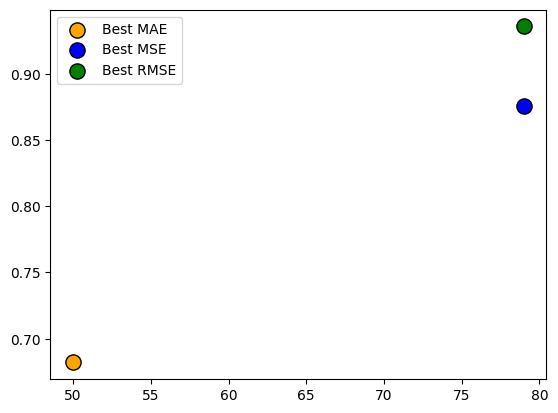

In [52]:
# Indices of best configs
i_mae = avg_results["test_mae"].idxmin()
i_mse = avg_results["test_mse"].idxmin()
i_rmse = avg_results["test_rmse"].idxmin()

# After your existing plt.plot(...) calls:
plt.scatter(avg_results.loc[i_mae, "config_id"],
            avg_results.loc[i_mae, "test_mae"],
            color="orange", s=120, edgecolor="black", zorder=5, label="Best MAE")

plt.scatter(avg_results.loc[i_mse, "config_id"],
            avg_results.loc[i_mse, "test_mse"],
            color="blue", s=120, edgecolor="black", zorder=5, label="Best MSE")

plt.scatter(avg_results.loc[i_rmse, "config_id"],
            avg_results.loc[i_rmse, "test_rmse"],
            color="green", s=120, edgecolor="black", zorder=5, label="Best RMSE")

plt.legend()
plt.show()
